<a href="https://colab.research.google.com/github/AngelB26/ICTAK/blob/main/UnSupervised_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('/content/Wholesale customers data.csv')

In [3]:
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [4]:
data.isna().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [6]:
data.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [7]:
data['Fresh'].nunique()

433

In [8]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [11]:
data.columns

Index(['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen'],
      dtype='object')

In [12]:
data[['Fresh', 'Milk', 'Grocery', 'Frozen','Detergents_Paper', 'Delicassen']] = scaler.fit_transform(data[['Fresh', 'Milk', 'Grocery', 'Frozen','Detergents_Paper', 'Delicassen']])

In [13]:
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,0.112940,0.130727,0.081464,0.003106,0.065427,0.027847
1,2,3,0.062899,0.132824,0.103097,0.028548,0.080590,0.036984
2,2,3,0.056622,0.119181,0.082790,0.039116,0.086052,0.163559
3,1,3,0.118254,0.015536,0.045464,0.104842,0.012346,0.037234
4,2,3,0.201626,0.072914,0.077552,0.063934,0.043455,0.108093


In [14]:
x=data.drop(['Region','Channel'],axis=1)

In [15]:
#KMeans

In [16]:
from sklearn.cluster import KMeans

In [17]:
wcss=[]
for i in range(1,11):
 km=KMeans(n_clusters=i,n_init=10)
 km.fit(x)
 css=km.inertia_
 wcss.append(css)


In [18]:
wcss

[24.924244504665523,
 17.246032935216448,
 13.878892004833084,
 10.76666039838505,
 9.11975308986465,
 7.9652589386433,
 7.161090246527231,
 6.665150223603307,
 5.9715736086826965,
 5.608029007325667]

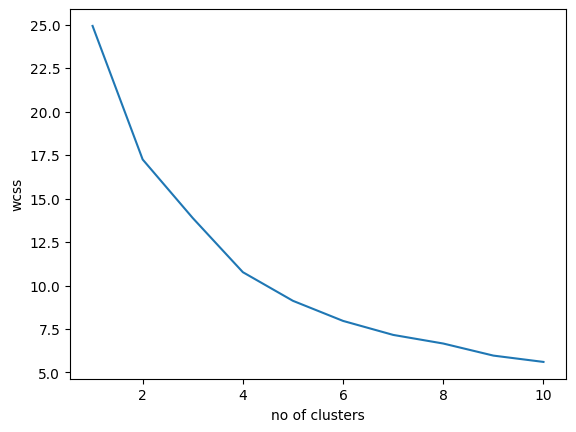

In [19]:
#elbow method
plt.plot(range(1,11),wcss)
plt.xlabel('no of clusters')
plt.ylabel('wcss')
plt.show()


In [ ]:
#from elbow method 5 is the optimum no of clusters

In [20]:
km=KMeans(n_clusters=5,n_init=10)

In [21]:
km.fit(x)

KMeans(n_clusters=5, n_init=10)

In [22]:
y_km=km.predict(x)


In [23]:
y_km

array([3, 3, 3, 3, 4, 3, 3, 3, 3, 2, 2, 3, 4, 2, 4, 3, 2, 3, 4, 3, 3, 3,
       4, 2, 4, 3, 3, 3, 2, 4, 4, 3, 4, 4, 3, 3, 4, 2, 2, 4, 4, 4, 2, 2,
       3, 2, 2, 1, 3, 2, 3, 3, 4, 2, 4, 3, 2, 2, 3, 3, 3, 1, 3, 2, 3, 1,
       3, 4, 3, 3, 4, 4, 3, 4, 3, 4, 3, 2, 3, 3, 3, 2, 3, 4, 3, 1, 1, 4,
       3, 4, 3, 3, 2, 0, 2, 3, 3, 3, 3, 3, 2, 2, 3, 0, 3, 3, 2, 2, 3, 2,
       3, 2, 4, 3, 3, 3, 3, 3, 4, 3, 3, 3, 3, 3, 4, 0, 4, 4, 3, 4, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 3, 3, 2, 3, 3, 3, 4, 3, 3, 4, 3,
       3, 2, 2, 3, 3, 2, 3, 3, 3, 2, 3, 2, 3, 3, 3, 3, 2, 2, 3, 2, 3, 2,
       4, 3, 3, 3, 3, 0, 2, 0, 3, 3, 3, 3, 2, 2, 4, 3, 3, 2, 3, 4, 4, 3,
       3, 3, 2, 2, 4, 3, 3, 2, 3, 3, 3, 2, 4, 1, 3, 3, 2, 2, 2, 3, 2, 3,
       3, 3, 3, 3, 3, 3, 4, 3, 3, 3, 3, 3, 4, 3, 3, 3, 3, 4, 3, 4, 4, 4,
       4, 3, 3, 2, 3, 3, 3, 3, 3, 2, 3, 4, 3, 4, 3, 3, 4, 4, 3, 3, 4, 3,
       2, 2, 2, 4, 2, 3, 3, 3, 3, 4, 3, 3, 4, 3, 3, 3, 3, 3, 4, 4, 4, 4,
       3, 3, 3, 4, 3, 3, 3, 2, 4, 3, 4, 3, 3, 3, 3,

In [25]:
pd.Series(y_km).value_counts()

3    253
4     91
2     83
1      7
0      6
dtype: int64

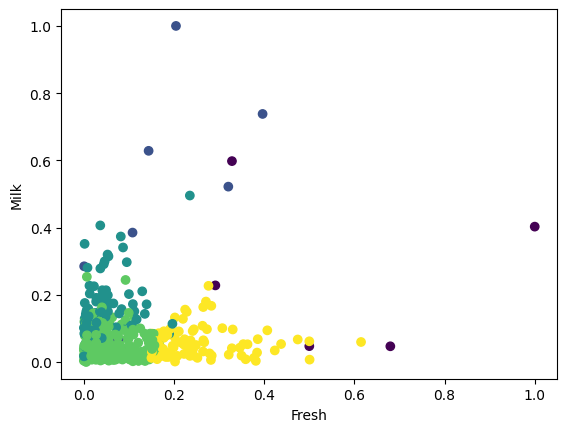

In [26]:
plt.scatter(x['Fresh'],x['Milk'],c=y_km)
plt.xlabel('Fresh')
plt.ylabel('Milk')
plt.show()


In [28]:
data['Cluster']=y_km

In [29]:
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Cluster
0,2,3,0.112940,0.130727,0.081464,0.003106,0.065427,0.027847,3
1,2,3,0.062899,0.132824,0.103097,0.028548,0.080590,0.036984,3
2,2,3,0.056622,0.119181,0.082790,0.039116,0.086052,0.163559,3
3,1,3,0.118254,0.015536,0.045464,0.104842,0.012346,0.037234,3
4,2,3,0.201626,0.072914,0.077552,0.063934,0.043455,0.108093,4


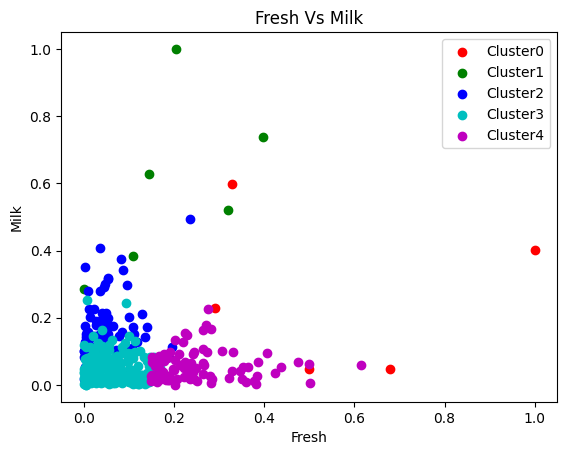

In [30]:
colors=['r','g','b','c','m']
for i in range(max(y_km)+1):
  cluster_data=x[y_km==i]
  plt.scatter(cluster_data['Fresh'],
              cluster_data['Milk'],
              c=colors[i],
              label=f'Cluster{i}')
plt.xlabel('Fresh')
plt.ylabel('Milk')
plt.title('Fresh Vs Milk')
plt.legend()


In [ ]:
#agglomerative hierarchial clustering


In [31]:
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import fcluster

In [36]:
mergings=linkage(x,method='ward')

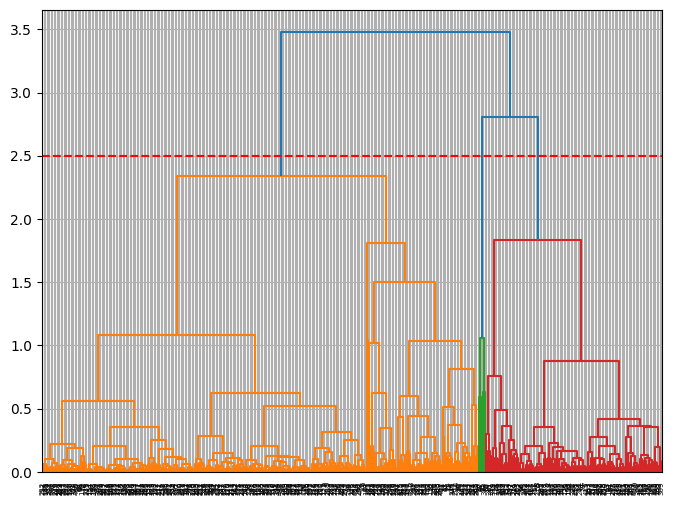

In [39]:
plt.figure(figsize=(8,6))
dendrogram(mergings)
plt.axhline(2.5,color='r',linestyle='--')
plt.grid()
plt.show()

In [40]:
from sklearn.cluster import AgglomerativeClustering
hc=AgglomerativeClustering(n_clusters=3,metric='euclidean',linkage='ward')
y_hc=hc.fit_predict(x)

In [41]:
y_hc

array([0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 2, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 2, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 2, 2, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,

<function matplotlib.pyplot.show(close=None, block=None)>

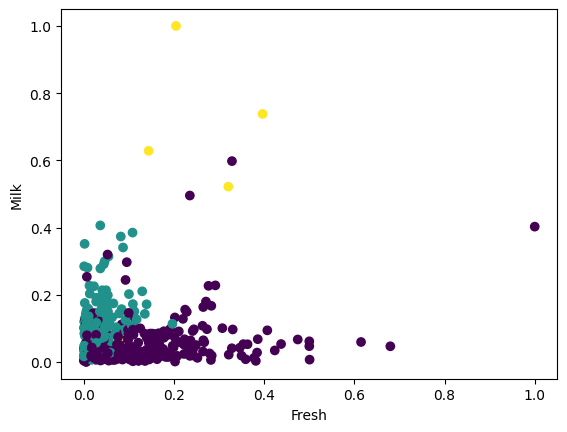

In [42]:
plt.scatter(x['Fresh'],x['Milk'],c=y_hc)
plt.xlabel('Fresh')
plt.ylabel('Milk')
plt.show

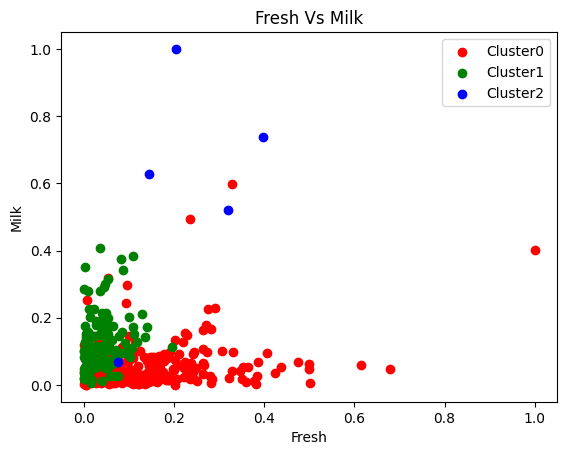

In [43]:
colors=['r','g','b','c','m']
for i in range(max(y_hc)+1):
  cluster_data=x[y_hc==i]
  plt.scatter(cluster_data['Fresh'],
              cluster_data['Milk'],
              c=colors[i],
              label=f'Cluster{i}')
plt.xlabel('Fresh')
plt.ylabel('Milk')
plt.title('Fresh Vs Milk')
plt.legend()


In [44]:
from sklearn.metrics import silhouette_score
silhouette=silhouette_score(x,y_hc)

In [45]:
silhouette


0.3234985905304998

In [46]:
silhouette=silhouette_score(x,y_km)

In [47]:
silhouette

0.3568021684981584

In [53]:
x.corr()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Fresh,1.000000,0.100510,-0.011854,0.345881,-0.101953,0.244690
Milk,0.100510,1.000000,0.728335,0.123994,0.661816,0.406368
Grocery,-0.011854,0.728335,1.000000,-0.040193,0.924641,0.205497
Frozen,0.345881,0.123994,-0.040193,1.000000,-0.131525,0.390947
Detergents_Paper,-0.101953,0.661816,0.924641,-0.131525,1.000000,0.069291
Delicassen,0.244690,0.406368,0.205497,0.390947,0.069291,1.000000


In [49]:
import seaborn as sns

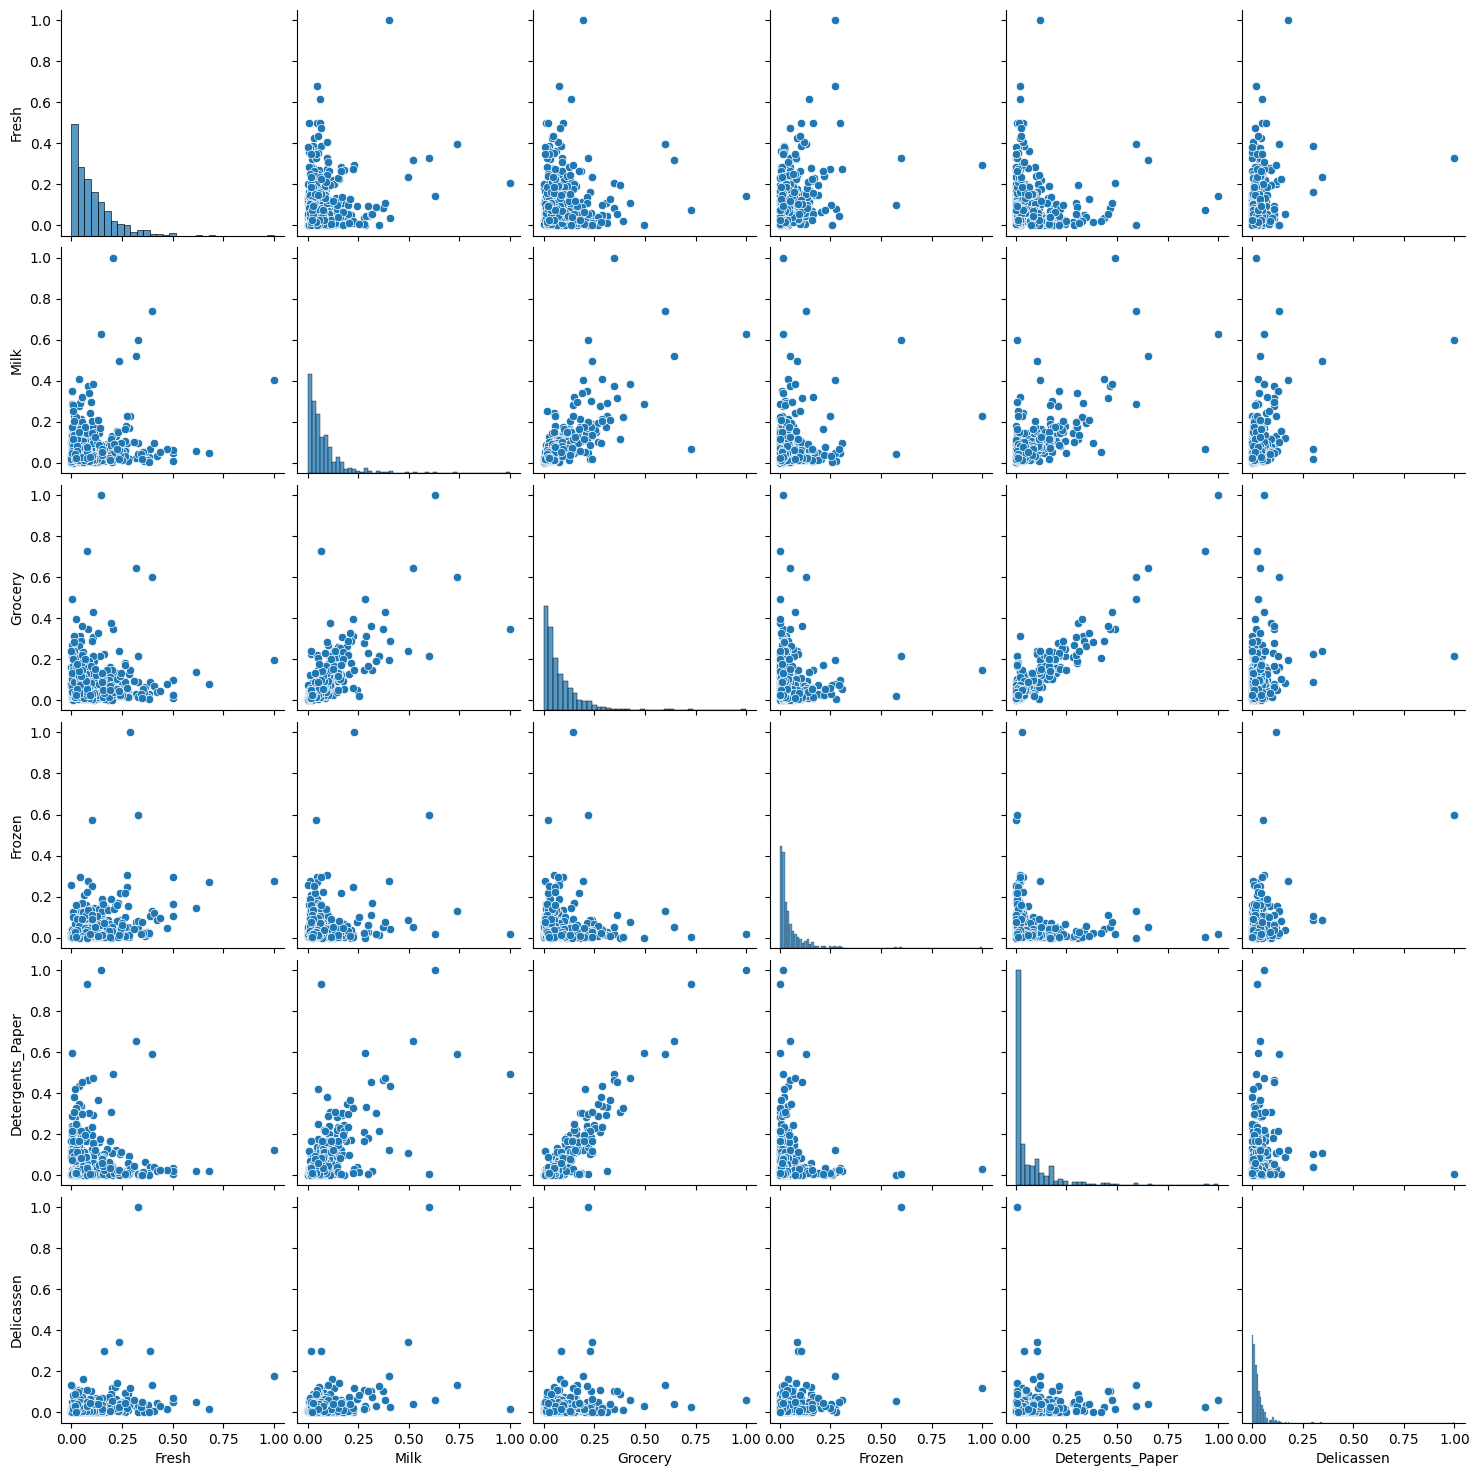

In [54]:
sns.pairplot(x)

In [55]:
x.mean()

Fresh               0.106977
Milk                0.078173
Grocery             0.085671
Frozen              0.050078
Detergents_Paper    0.070510
Delicassen          0.031745
dtype: float64

In [56]:
x.var()

Fresh               0.012718
Milk                0.010098
Grocery             0.010492
Frozen              0.006366
Detergents_Paper    0.013640
Delicassen          0.003460
dtype: float64

In [57]:
x.shape

(440, 6)

In [58]:
#standardization


In [59]:
from sklearn.preprocessing import scale

In [60]:
x=pd.DataFrame(scale(x),columns=x.columns)


In [61]:
from sklearn.decomposition import PCA

In [62]:
pca=PCA()


In [63]:
pc_array=pca.fit_transform(x)

In [64]:
pc_array.shape

(440, 6)

In [66]:
pc_array=pd.DataFrame(pc_array,columns=['pc1','pc2','pc3','pc4','pc5','pc6'])



In [67]:
pc_array

,pc1,pc2,pc3,pc4,pc5,pc6
0,0.193291,-0.305100,-0.140878,-0.486432,0.495281,-0.007414
1,0.434420,-0.328413,0.319007,-0.178830,0.365579,0.054572
2,0.811143,0.815096,1.523416,-1.254082,-0.379054,-0.277539
3,-0.778648,0.652754,0.163012,0.380060,-0.276138,0.060718
4,0.166287,1.271434,0.066279,-0.826227,-0.394211,-0.026825
...,...,...,...,...,...,...
435,0.870602,2.220845,-0.605500,1.049263,0.423781,0.869495
436,-0.902520,1.676916,-1.418980,-0.572274,-0.257026,-0.226535
437,3.465704,-1.039838,-0.713161,0.033408,-0.538768,-0.085349
438,-0.918023,-0.030047,0.258408,-0.524578,-0.093215,-0.028943


In [68]:
pc_array.corr().round()

,pc1,pc2,pc3,pc4,pc5,pc6
pc1,1.0,0.0,0.0,0.0,0.0,-0.0
pc2,0.0,1.0,0.0,0.0,0.0,-0.0
pc3,0.0,0.0,1.0,0.0,-0.0,-0.0
pc4,0.0,0.0,0.0,1.0,0.0,0.0
pc5,0.0,0.0,-0.0,0.0,1.0,0.0
pc6,-0.0,-0.0,-0.0,0.0,0.0,1.0


In [ ]:
#no correlation

In [69]:
pca.explained_variance_

array([2.65099857, 1.70646229, 0.74175057, 0.56501435, 0.28632709,
       0.06311455])

In [70]:
pca.explained_variance_ratio_*100

array([44.08289288, 28.37639953, 12.3344129 ,  9.39550375,  4.7612724 ,
        1.04951854])

In [72]:
44.08289288+ 28.37639953+ 12.3344129 +  9.39550375+  4.7612724 +1.04951854

100.0

In [73]:
pca1=PCA(n_components=5)

In [74]:
pc_array1=pca1.fit_transform(x)

In [75]:
pc_array1.shape

(440, 5)

In [ ]:
#5 columns instead of 6

In [78]:
pc_array1=pd.DataFrame(pc_array,columns=['pc1','pc2','pc3','pc4','pc5'])

In [79]:
pc_array1

,pc1,pc2,pc3,pc4,pc5
0,0.193291,-0.305100,-0.140878,-0.486432,0.495281
1,0.434420,-0.328413,0.319007,-0.178830,0.365579
2,0.811143,0.815096,1.523416,-1.254082,-0.379054
3,-0.778648,0.652754,0.163012,0.380060,-0.276138
4,0.166287,1.271434,0.066279,-0.826227,-0.394211
...,...,...,...,...,...
435,0.870602,2.220845,-0.605500,1.049263,0.423781
436,-0.902520,1.676916,-1.418980,-0.572274,-0.257026
437,3.465704,-1.039838,-0.713161,0.033408,-0.538768
438,-0.918023,-0.030047,0.258408,-0.524578,-0.093215


In [80]:
pca1.explained_variance_

array([2.65099857, 1.70646229, 0.74175057, 0.56501435, 0.28632709])

In [81]:
pca1.explained_variance_ratio_*100

array([44.08289288, 28.37639953, 12.3344129 ,  9.39550375,  4.7612724 ])

In [82]:
44.08289288+ 28.37639953+ 12.3344129 +  9.39550375+  4.7612724

98.95048146